# seaborn: statistical data visualization
## Plotting with categorical data

Divide categorical plots into three groups:
* <code>swarmplot()</code> and <code>stripplot()</code> are those that show each observation at each level of the categorical variable. 
* <code>boxplot()</code> and <code>violinplot()</code> are those that show an abstract representation of each distribution of observations.  
* <code>barplot()</code> and <code>pointplot()</code> are those that apply a statistical estimation to show a measure of central tendency and confidence interval.

we will also discuss widely used categorical plots, such as <code>countplot()</code> and <code>factorplot()</code> in this section.

In [1]:
# import seaborn library and load the dataset 'tips'
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [3]:
tips[tips['day']=='Thur']

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
202,13.00,2.00,Female,Yes,Thur,Lunch,2
203,16.40,2.50,Female,Yes,Thur,Lunch,2
204,20.53,4.00,Male,Yes,Thur,Lunch,4
205,16.47,3.23,Female,Yes,Thur,Lunch,3


### Categorical scatterplots: 
### <code>stripplot()</code>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

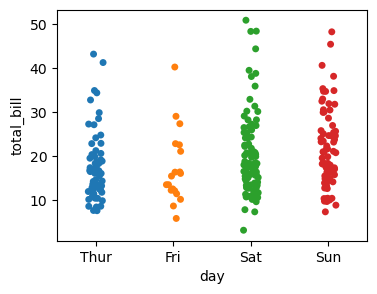

In [4]:
plt.figure(figsize=(4, 3))
sns.stripplot(x="day", y="total_bill",data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

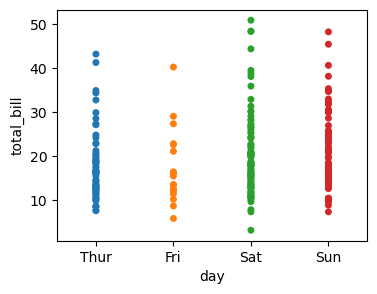

In [6]:
plt.figure(figsize=(4, 3))
sns.stripplot(x="day", y="total_bill", jitter=False, data=tips)

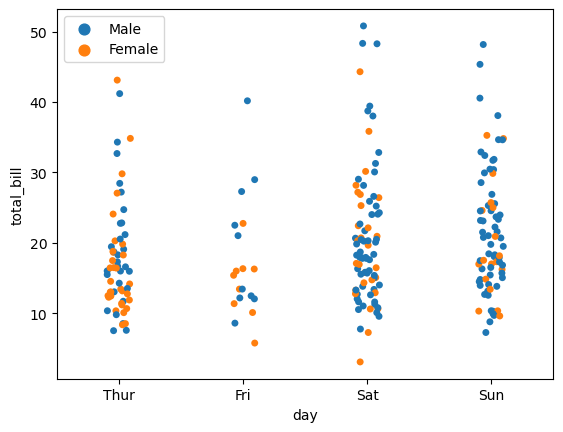

In [8]:
sns.stripplot(x="day", y="total_bill",data=tips,hue="sex" )#palette='coolwarm')
plt.legend(loc=2)

### <code>swarmplot()</code>

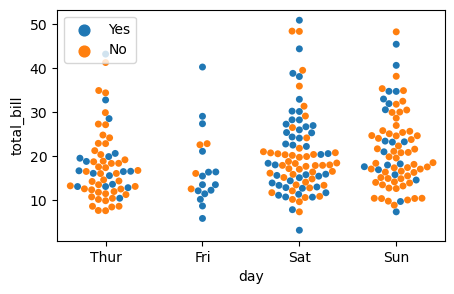

In [9]:
plt.figure(figsize=(5, 3))
sns.swarmplot(x="day", y="total_bill",data=tips,
              hue="smoker")#,palette='coolwarm')
plt.legend(loc=2)

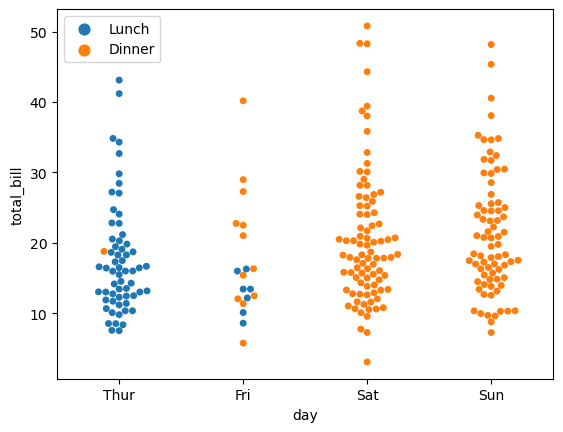

In [11]:
sns.swarmplot(x="day",y="total_bill", hue="time", data=tips)
plt.legend(loc=2)

We can **observe from the plot above**:
* almost all the customers come for lunch on Thursday
* almost all the customers come for dinner on the weekends

On Fridays, not many go out for lunch or dinner, they may want to save money and energy for the weekends!

### Distributions of observations within categories:
### <code>boxplot()</code>
These type of plots are used to show the distribution of categorical data. A box plot (also known as a box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. <br>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

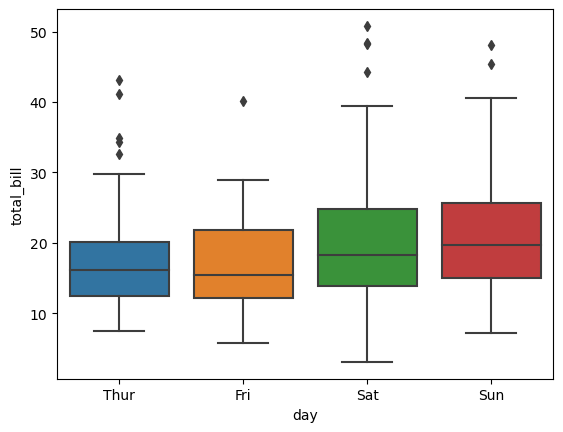

In [12]:
sns.boxplot(x="day", y="total_bill", data=tips) #palette='rainbow'

&#9758; Understanding the Box Plot:<br>
We have total_bill along Y and category 'day' along X. <br>
If we look at any one of the box, we see the data points in each box / box-and-whisker plot are divided into four quartile groups :<br>
* Quartile group 1 - Q1: between the bottom whisker and the bottom of the box
* Quartile group 2 - Q2: between the bottom of the box to the line in the box (median)
* Quartile group 3 - Q3: between the median and the upper end of the box
* Quartile group 4 - Q4: between upper end of the box and the upper whisker

Points outside the quartiles are outliers.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

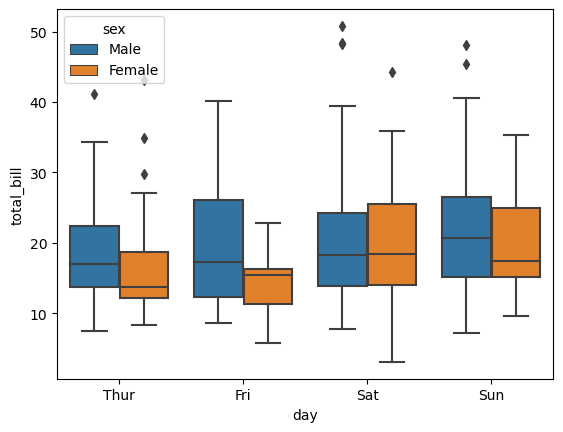

In [13]:
sns.boxplot(x="day", y="total_bill", data=tips,
           hue = 'sex') #palette='rainbow')

In the plot above, we split the data into two boxes for each day based on their sex or smoking habit in different color. Now we can compare daily behavior of the person along with other category sex or smoking.<br>
This is a true power of seaborn which quickly allow us to add another layer using hue parameter and provide in-depth information from our data very quickly and smoothly.

### <code>violinplot()</code>
The <code>violinplot()</code> draw a combination of boxplot and kernel density estimate. <br>

A violin plot plays a similar role as a box and whisker plot. <br>

<AxesSubplot:xlabel='day', ylabel='total_bill'>

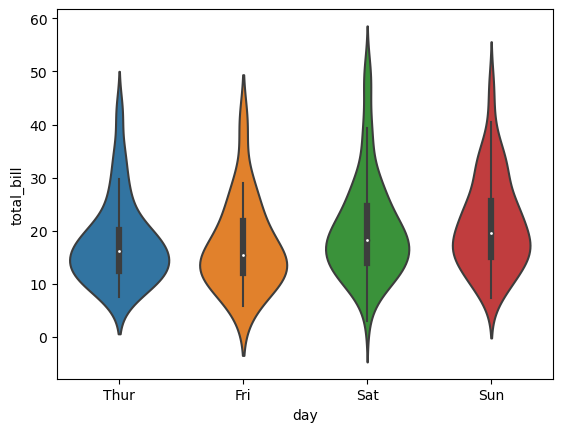

In [14]:
sns.violinplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

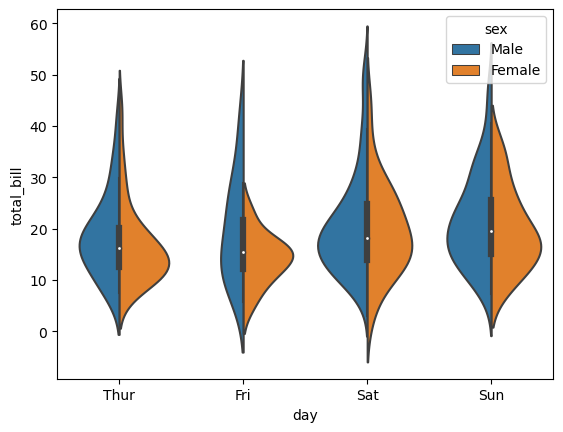

In [16]:
sns.violinplot(x="day", y="total_bill",data=tips,
               hue='sex', split=True)

### Statistical estimation within categories:
Often, rather than showing the distribution within each category, you might want to show the [central tendency](https://en.wikipedia.org/wiki/Central_tendency) of the values. Seaborn provides elegant ways to show such information using its buit-in functions:
### <code>barplot()</code>

<code>barplot()</code> is a general plot that allows us to aggregate the categorical data based off some function, by default the mean. <br>

In [17]:
tips[tips['day']=='Thur']['total_bill'].mean()

17.682741935483865

<AxesSubplot:xlabel='day', ylabel='total_bill'>

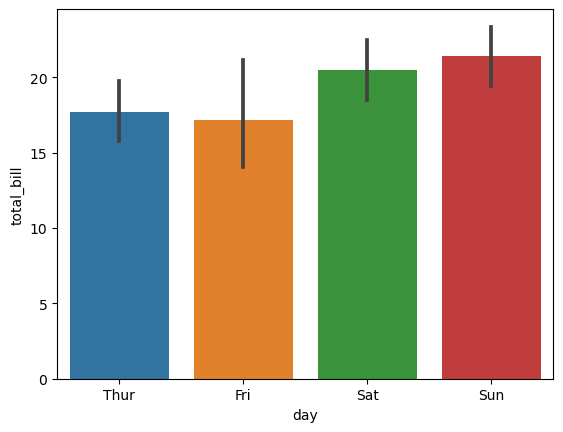

In [18]:
#sns.barplot(x='sex', y='total_bill',data=tips)
sns.barplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

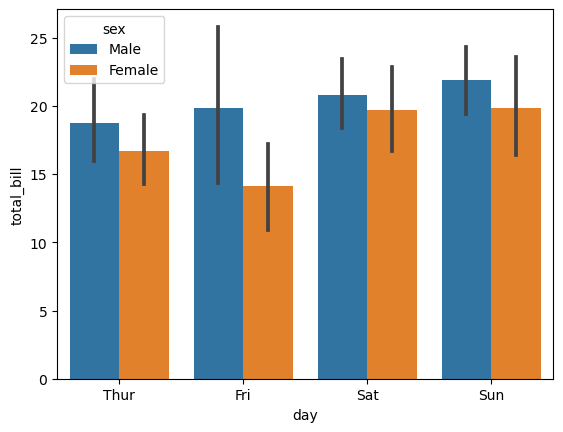

In [19]:
sns.barplot(x="day", y="total_bill", hue="sex",data=tips)

### <code>countplot()</code>

A special case for the bar plot is when we want to show the number of observations in each category rather than computing a statistic for a second variable, such as mean, std etc. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the <code>countplot()</code> function.<br>

In [20]:
tips[tips['day']=='Thur']['total_bill'].count()

62

<AxesSubplot:xlabel='day', ylabel='count'>

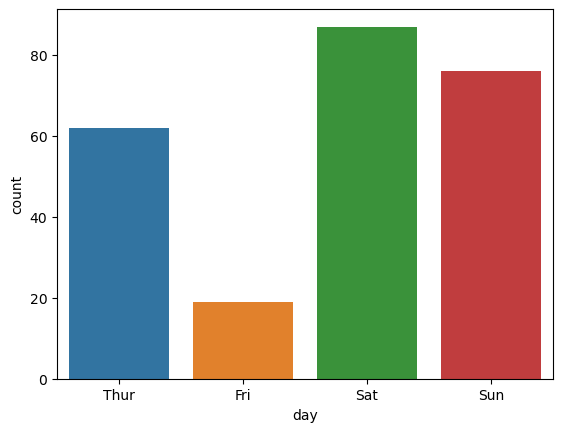

In [22]:
sns.countplot(x="day", data=tips)

<AxesSubplot:xlabel='day', ylabel='count'>

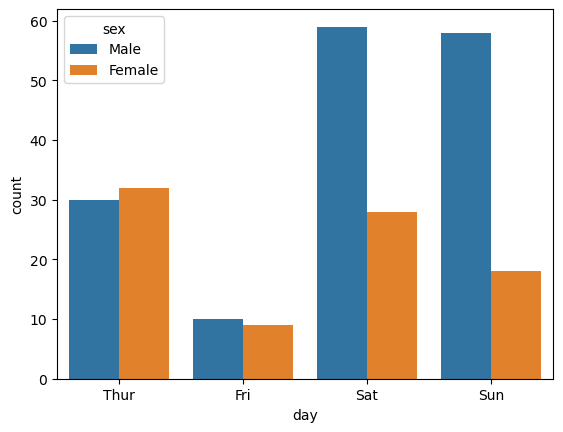

In [23]:
sns.countplot(x="day", hue="sex",data=tips)